=== 5 DATA TERATAS ===
     842302  M  17.99  10.38   122.8    1001   0.1184   0.2776  0.3001  \
0    842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869   
1  84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974   
2  84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414   
3  84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980   
4    843786  M  12.45  15.70   82.57   477.1  0.12780  0.17000  0.1578   

    0.1471  ...  25.38  17.33   184.6    2019  0.1622  0.6656  0.7119  0.2654  \
0  0.07017  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
1  0.12790  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
2  0.10520  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
3  0.10430  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   
4  0.08089  ...  15.47  23.75  103.40   741.6  0.1791  0.5249  0.5355  0.1741   

   0.4601   0.1189  
0  0.2750  0.08902  
1  

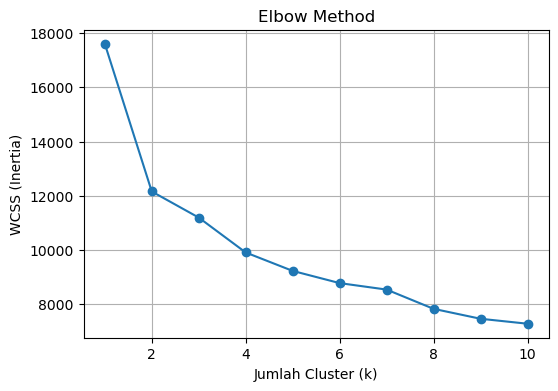


=== Silhouette Scores ===
k = 2: silhouette = 0.3382
k = 3: silhouette = 0.2626
k = 4: silhouette = 0.2008
k = 5: silhouette = 0.1725
k = 6: silhouette = 0.1451
k = 7: silhouette = 0.1221
k = 8: silhouette = 0.1439
k = 9: silhouette = 0.1408
k = 10: silhouette = 0.1322

Best K by silhouette: 2 (silhouette=0.3382)

Menggunakan K = 2 untuk KMeans final.
Jumlah per cluster (KMeans hasil):
{0: 381, 1: 187}


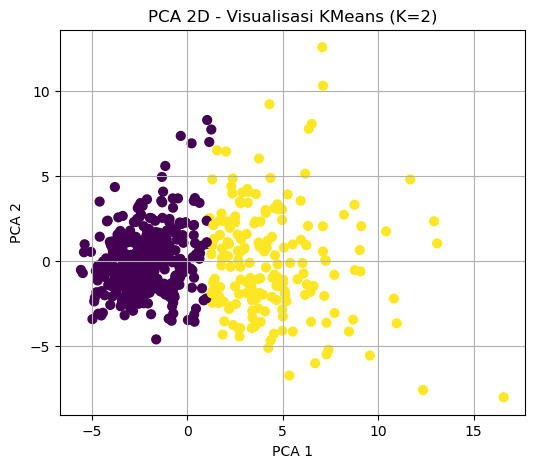


Ukuran split:
train_val: 454
test: 114

Distribusi label pada train_val:
M
B    285
M    169
Name: count, dtype: int64

Distribusi label pada test:
M
B    72
M    42
Name: count, dtype: int64

File tersimpan:
 - C:\Users\User\train_val.data
 - C:\Users\User\test.data

Preview train_val.data:
      842302  M   17.99  10.38   122.8    1001   0.1184   0.2776    0.3001  \
0  911320501  B  11.600  18.36   73.88   412.7  0.08508  0.05855  0.033670   
1   87139402  B  12.320  12.39   78.85   464.1  0.10280  0.06981  0.039870   
2   88330202  M  17.460  39.28  113.40   920.6  0.09812  0.12980  0.141700   
3     907145  B   9.742  19.12   61.93   289.7  0.10750  0.08333  0.008934   
4     853401  M  18.630  25.11  124.80  1088.0  0.10640  0.18870  0.231900   

    0.1471  ...  25.38  17.33   184.6    2019  0.1622  0.6656   0.7119  \
0  0.01777  ...  12.77  24.02   82.68   495.1  0.1342  0.1808  0.18600   
1  0.03700  ...  13.50  15.64   86.97   549.1  0.1385  0.1266  0.12420   
2  0.08811  ...

In [35]:
# full_pipeline_kmeans_and_split.py
# =================================================
# 1. IMPORT LIBRARY
# =================================================
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# =================================================
# 2. BACA DATASET (pastikan path benar)
# =================================================
path = "jantung.data"   # <-- path lokal file yang kamu upload
df = pd.read_csv(path)
print("=== 5 DATA TERATAS ===")
print(df.head(), "\n")
print("Total rows:", len(df), ", Total cols:", len(df.columns))

# =================================================
# 3. DETEKSI KOLom LABEL (otomatis); ubah manual jika salah
# =================================================
label_col = None
candidates = ['M', 'diagnosis', 'Diagnosis', 'label', 'target', 'class']
for c in candidates:
    if c in df.columns:
        label_col = c
        break

# fallback: cari kolom object dengan 2 nilai unik
if label_col is None:
    for col in df.columns:
        if df[col].dtype == object and df[col].nunique() == 2:
            label_col = col
            break

# fallback numeric with 2 unique values
if label_col is None:
    for col in df.columns:
        if df[col].nunique() == 2:
            label_col = col
            break

if label_col is None:
    raise ValueError("Gagal deteksi kolom label otomatis. Silakan set label_col manual (mis. label_col = 'M').")

print(f"Detected label column: {label_col}")
print("Distribusi keseluruhan (label):")
print(df[label_col].value_counts())

# =================================================
# 4. PILIH KOLOM NUMERIK (fitur untuk clustering)
# =================================================
df_num = df.select_dtypes(include=[np.number])
print("\nKolom numerik yang dipakai untuk clustering:")
print(df_num.columns.tolist())

# =================================================
# 5. NORMALISASI
# =================================================
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_num)

# =================================================
# 6. MENENTUKAN JUMLAH CLUSTER (ELBOW METHOD)
# =================================================
wcss = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, n_init='auto', random_state=42)
    km.fit(data_scaled)
    wcss.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(list(K_range), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("WCSS (Inertia)")
plt.grid(True)
plt.show()

# =================================================
# 7. SILHOUETTE SCORE (opsional, membantu memilih K)
# =================================================
print("\n=== Silhouette Scores ===")
sil_scores = {}
for k in range(2, 11):
    km = KMeans(n_clusters=k, n_init='auto', random_state=42)
    labels_k = km.fit_predict(data_scaled)
    sc = silhouette_score(data_scaled, labels_k)
    sil_scores[k] = sc
    print(f"k = {k}: silhouette = {sc:.4f}")

# Rekomendasi otomatis: pilih k dengan silhouette tertinggi (atau gunakan K=2 karena sifat dataset)
best_k_by_sil = max(sil_scores, key=sil_scores.get)
print(f"\nBest K by silhouette: {best_k_by_sil} (silhouette={sil_scores[best_k_by_sil]:.4f})")

# =================================================
# 8. JALANKAN K-MEANS FINAL (gunakan K yang diinginkan)
# =================================================
# Default recommendation untuk dataset ini adalah K = 2 (benign vs malignant),
# tapi kamu bisa ganti K = best_k_by_sil atau nilai lain.
K = 2
print(f"\nMenggunakan K = {K} untuk KMeans final.")

km_final = KMeans(n_clusters=K, n_init='auto', random_state=42)
cluster_labels = km_final.fit_predict(data_scaled)

# Jangan menyimpan cluster ke df yang akan di-split; ini hanya untuk analisis sementara
print("Jumlah per cluster (KMeans hasil):")
(unique, counts) = np.unique(cluster_labels, return_counts=True)
print(dict(zip(unique, counts)))

# =================================================
# 9. VISUALISASI PCA 2D DARI HASIL CLUSTERING
# =================================================
pca = PCA(n_components=2, random_state=42)
reduced = pca.fit_transform(data_scaled)

plt.figure(figsize=(6,5))
plt.scatter(reduced[:,0], reduced[:,1], c=cluster_labels, cmap='viridis', s=40)
plt.title(f"PCA 2D - Visualisasi KMeans (K={K})")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

# =================================================
# 10. SPLIT STRATIFIED (train_val:455, test:114)
# =================================================
n_total = len(df)
n_test = 114
test_size = n_test / n_total

train_val, test = train_test_split(df, test_size=test_size, stratify=df[label_col], random_state=42)

# verify sizes (should be 455 and 114)
print("\nUkuran split:")
print("train_val:", len(train_val))
print("test:", len(test))

print("\nDistribusi label pada train_val:")
print(train_val[label_col].value_counts())
print("\nDistribusi label pada test:")
print(test[label_col].value_counts())

# =================================================
# 11. SIMPAN FILE train_val.data & test.data
# =================================================
out_dir = r"C:\Users\User"
os.makedirs(out_dir, exist_ok=True)
train_path = os.path.join(out_dir, "train_val.data")
test_path = os.path.join(out_dir, "test.data")

train_val.to_csv(train_path, index=False)
test.to_csv(test_path, index=False)

print(f"\nFile tersimpan:\n - {train_path}\n - {test_path}")

# =================================================
# 12. (Opsional) Tampilkan beberapa baris file yang disimpan
# =================================================
print("\nPreview train_val.data:")
print(pd.read_csv(train_path).head())
print("\nPreview test.data:")
print(pd.read_csv(test_path).head())
